In [3]:
import torch
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
durations_file_glow = h5py.File("/work/asr3/rossenbach/rilling/sisyphus_work_dirs/glow_tts_asr/i6_core/returnn/forward/ReturnnForwardJob.suZsOECsBeYn/output/output.hdf", "r")
durations_file_ctc = h5py.File("/work/asr4/rossenbach/sisyphus_work_folders/tts_asr_2021_work/i6_experiments/users/rossenbach/tts/duration_extraction/ViterbiAlignmentToDurationsJob.AyAO6JWXTnVc/output/durations.hdf", "r")


In [5]:
assert durations_file_ctc.keys() == durations_file_glow.keys()
durations_file_ctc.keys()

<KeysViewHDF5 ['inputs', 'labels', 'seqLengths', 'seqTags']>

In [6]:
durations_ctc = durations_file_ctc["inputs"]
seq_lengths_ctc = np.array(durations_file_ctc["seqLengths"])[:,0]
seq_tags_ctc = list(durations_file_ctc["seqTags"])

durations_glow = durations_file_glow["inputs"].astype(np.int32)
seq_lengths_glow = np.array(durations_file_glow["seqLengths"])[:,0]
seq_tags_glow = list(durations_file_glow["seqTags"])

In [7]:
def get_durations_for_index(durations, lengths, index):
    start = 0
    end = 0
    for i in range(index+1):
        start = end
        end += lengths[i]
    return durations[start:end]


In [8]:
def get_durations_for_tag(durations, lengths, tags, tag):
    return get_durations_for_index(durations, lengths, tags.index(tag))

In [9]:
def glow_get_durations_for_tag(tag):
    return get_durations_for_tag(durations_glow, seq_lengths_glow, seq_tags_glow, tag)
def glow_get_durations_for_index(index):
    return get_durations_for_index(durations_glow, seq_lengths_glow, index)
def ctc_get_durations_for_tag(tag):
    return get_durations_for_tag(durations_ctc, seq_lengths_ctc, seq_tags_ctc, tag).squeeze()
def ctc_get_durations_for_index(index):
    return get_durations_for_index(durations_ctc, seq_lengths_ctc, index).squeeze()


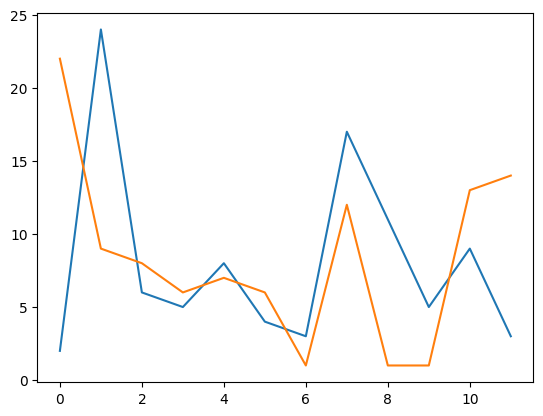

In [15]:
index_ctc = 2
index_glow = seq_tags_glow.index(seq_tags_ctc[index_ctc])

assert seq_tags_ctc[index_ctc] == seq_tags_glow[index_glow]

duration_ctc = ctc_get_durations_for_index(index_ctc)
duration_glow = glow_get_durations_for_index(index_glow)

fig, ax = plt.subplots()
ax.plot(duration_ctc)
ax.plot(duration_glow)
